##### Öncelikle 

In [1]:
from config.config import BOOK_API_KEY
from googleapiclient.discovery import build

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def anahtar_kelimeye_göre_ara(books_service, keywords):
    request = books_service.volumes().list(
        q=",".join(keywords)
    )
    response = request.execute()
    return response.get("items", [])

In [3]:
api_service_name = "books"
api_version = "v1"

book_keyword = ["Data Science"]

books = build(api_service_name, api_version, developerKey=BOOK_API_KEY)

# Anahtar kelimelere göre kitapları getir
eslesen_kitaplar = anahtar_kelimeye_göre_ara(books, book_keyword)

# Verileri bir DataFrame'e dönüştür
books_info_df = pd.DataFrame([
    {
        "Title": book["volumeInfo"]["title"],
        "Authors": book["volumeInfo"].get("authors", ["N/A"]),
        "Description": book["volumeInfo"].get("description", "N/A"),
        "PublishedDate": book["volumeInfo"].get("publishedDate", "N/A"),
        "Categories": book["volumeInfo"].get("categories", "N/A")
    }
    for book in eslesen_kitaplar
])

# DataFrame'i ekrana yazdır
print(books_info_df)

                                             Title  \
0                                     Data Science   
1                Data Science and Its Applications   
2                        Data Science from Scratch   
3                     Fundamentals of Data Science   
4                                     Data Science   
5               Practical Data Science with Python   
6  Data Science Programming All-in-One For Dummies   
7                       Developing Analytic Talent   
8                      R for Data Science Cookbook   
9                                     Data Science   

                               Authors  \
0  [John D. Kelleher, Brendan Tierney]   
1       [Aakanksha Sharaff, G R Sinha]   
2                          [Joel Grus]   
3                       [Samuel Burns]   
4         [Vijay Kotu, Bala Deshpande]   
5                      [Nathan George]   
6   [John Paul Mueller, Luca Massaron]   
7                  [Vincent Granville]   
8          [Yu-Wei, Chiu (D

In [4]:
def en_uretken_yil(books_info_df):
    # 'publishedDate' sütunu tarih nesnelerine dönüştürülür
    books_info_df['PublishedDate'] = pd.to_datetime(books_info_df['PublishedDate'], errors='coerce')
    # errors='coerce' parametresi, dönüştürme sırasında hatalar oluşursa hata yerine NaN (Not a Number) değerini ekler
    
    # 'publishedDate' sütunundan yıl bilgisi çıkartılarak 'publishedYear' adında yeni bir sütuna eklenir
    books_info_df['PublishedYear'] = books_info_df['PublishedDate'].dt.year
    
    # En çok tekrar eden yıl bulunur ve ilk olan alınır
    en_uretken_yil = books_info_df['PublishedYear'].mode()[0]
    
    return en_uretken_yil


In [5]:
def plot_yillik_kitaplar(books_info_df):
    # 'PublishedDate' sütunundaki tarih verilerini alır ve bu tarihleri yıl cinsine dönüştürür.
    # Eğer bir hata oluşursa (örneğin, tarih formatı hatalıysa), 'errors='coerce'' parametresi sayesinde NaN (Not a Number) değeri atanır.
    books_info_df['PublishedYear'] = pd.to_datetime(books_info_df['PublishedDate'], errors='coerce').dt.year
    
    # Oluşturulan 'PublishedYear' sütununu kullanarak her yıl kaç kitap yayınlandığını hesaplar.
    # Bu sayıları, yıl sıralamasına göre gruplar ve her yılın kitap sayısını içeren bir Seri oluşturur.
    yillik_kitaplar = books_info_df['PublishedYear'].value_counts().sort_index()
    
    # Çubuk grafik üzerinde yıllara göre kitap sayısını gösterir.
    # 'kind='bar'' parametresi, çubuk grafik tipini belirtir.
    # 'xlabel', 'ylabel' ve 'title' parametreleri, grafiğin ekseni ve başlığını belirlemek içindir.
    yillik_kitaplar.plot(kind='bar', xlabel='Yıl', ylabel='Kitap Sayısı', title='Yıllara Göre Kitap Sayısı')
    
    # Grafiği gösterir.
    plt.show()


In [6]:
# En üretken yılı bul ve ekrana yazdır
en_uretken_yil = en_uretken_yil(books_info_df)
print(f"En üretken yıl: {en_uretken_yil}")

En üretken yıl: 2018


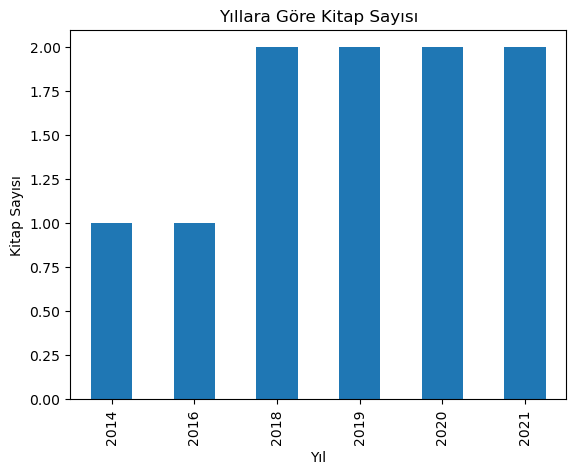

In [7]:
# Kitap sayısını yıl bazında çizdir
plot_yillik_kitaplar(books_info_df)

In [8]:
def plot_tur_dagilimi(books_info_df):
    tur_dagilimi = books_info_df['Categories'].value_counts()
    
    # Dağılım grafiği çizimi
    tur_dagilimi.plot(kind='bar', xlabel='Kitap Türü', ylabel='Kitap Sayısı', title='Kitap Türlerine Göre Dağılım')
    plt.show()


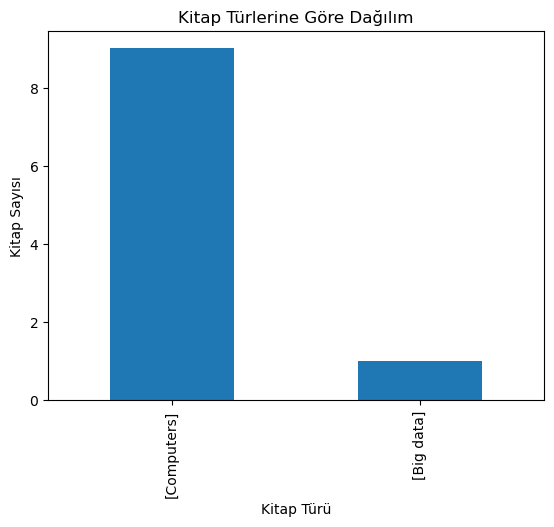

In [9]:
plot_tur_dagilimi(books_info_df)

In [10]:
def plot_yazar_basina_kitap(books_info_df):
    yazar_basina_kitap = books_info_df['Authors'].explode().value_counts()
    yazar_basina_kitap.plot(kind='bar', xlabel='Yazar', ylabel='Kitap Sayısı', title='Yazar Bazında Kitap Sayısı')
    plt.show()


##### Buradaki fonksiyonun işlevselliğini görebilmek adına yukarıda kullanılan book_keyword = ["Harry Potter"] şeklinde değiştirilmiştir.

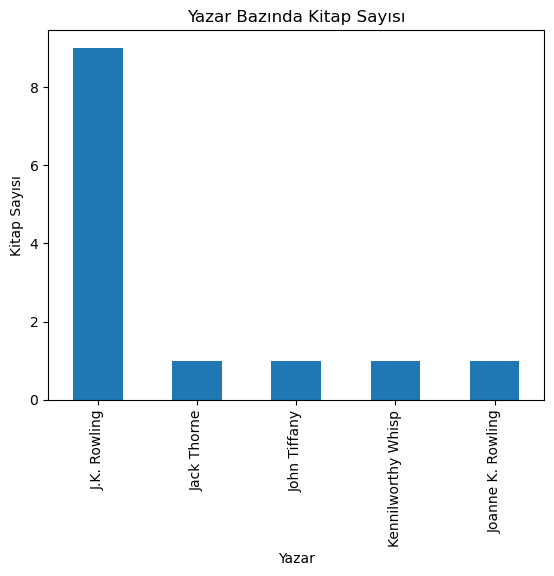

In [49]:
plot_yazar_basina_kitap(books_info_df)